HIERARCHICAL CLUSTRING :Hierarchical clustering is a type of unsupervised machine learning algorithm used to group data points into a hierarchy or tree of clusters. Unlike K-means clustering, hierarchical clustering does not require specifying the number of clusters in advance.
There are two main types of hierarchical clustering:
1. Agglomerative (Bottom-Up):
->Starts with each data point as its own cluster.
->Iteratively merges the closest pairs of clusters until only one cluster remains or the desired number of clusters is reached.

2. Divisive (Top-Down):
->Starts with all data points in one cluster.
->Iteratively splits the cluster into smaller clusters until each data point is its own cluster or the desired number of clusters is reached.

Steps in Agglomerative Hierarchical Clustering
1. Calculate the Distance Matrix: Compute the distance between every pair of data points using a distance metric such as Euclidean distance.

2. Merge Closest Clusters:Find the pair of clusters with the smallest distance between them and merge them into a single cluster.

3. Update the Distance Matrix:Recalculate the distances between the new cluster and all other clusters.

4. Repeat:Continue merging the closest pairs of clusters and updating the distance matrix until all data points are in one cluster or the desired number of clusters is achieved.

Dendogram : which helps to select number of clusters by selecting the largest vertical line such a way that no horizontal line passes through it.

Application :
1. Document and Text Clustering: Organizing documents or articles into a hierarchical structure based on content similarity.

2. Market Segmentation: Segmenting customers based on purchasing behavior, demographics, or preferences.

3. Image Segmentation: Dividing an image into segments based on pixel similarity.

4. Customer Support:
->Application: Grouping customer support tickets or feedback based on the nature of issues.

Advantages :
1. No Need to Specify Number of Clusters: Unlike K-means, there is no need to pre-specify the number of clusters.

2. Dendrogram: The dendrogram provides a visual representation of the data’s hierarchical structure, which can help in choosing the number of clusters.

3. Flexibility: Can use different distance metrics and linkage criteria based on the problem requirements.

4. Reproducibility: Deterministic in nature (especially agglomerative clustering) which means the result is reproducible.

Disadvantage's:
1. Computational Complexity: More computationally intensive compared to K-means, especially for large datasets (time complexity more).

2. No Reassignment: Once a merge or split is done, it cannot be undone, potentially leading to suboptimal clustering.

3. Scalability: Not suitable for very large datasets due to high memory and time requirements.

4. Sensitive to Noise and Outliers: Can be significantly affected by the presence of noisy data and outliers.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(iris_data)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [6]:
pca_scaled=pca.fit_transform(x_scaled)
pca_scaled.shape

(150, 2)

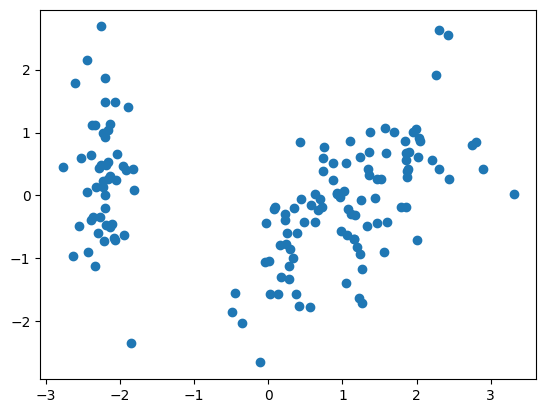

In [7]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

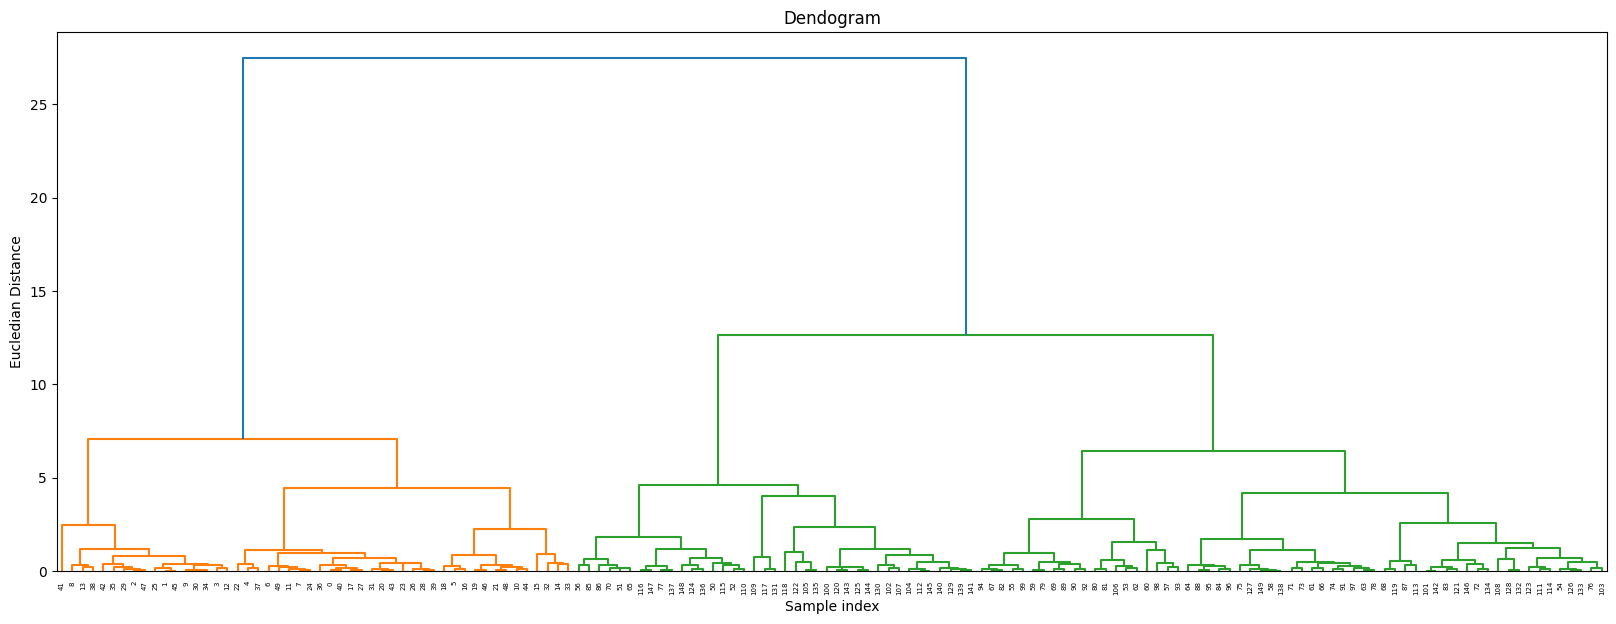

In [8]:
# Agglomerative clusters to construct a dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dendogram')

# create dendogram 
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Eucledian Distance')

In [9]:
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [10]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

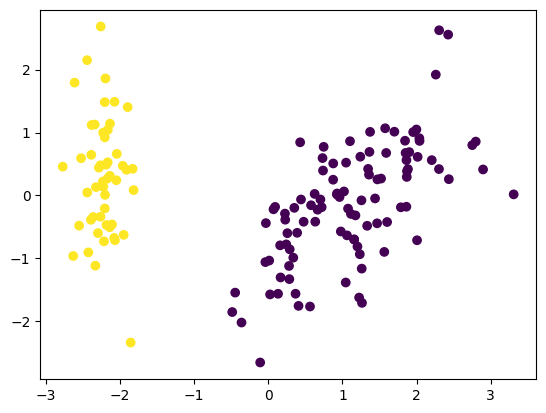

In [11]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Text(0, 0.5, 'silhouette coeffecient')

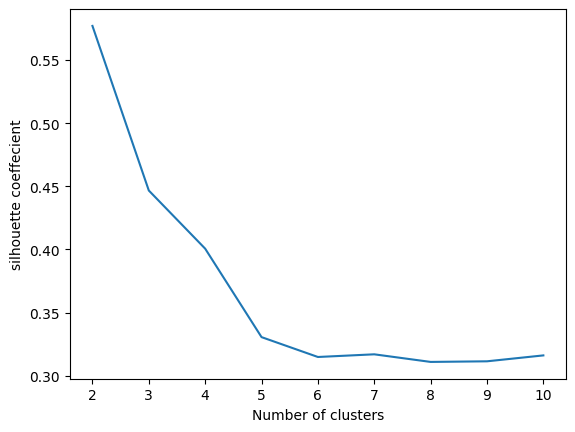

In [13]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette coeffecient')

Silhouette clustering:
Silhouette clustering is a method used to evaluate the quality of clusters created by a clustering algorithm. It measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.
